<a href="https://colab.research.google.com/github/AbhayNath001/CODSOFT/blob/main/Task-1%20(TITANIC%20SURVIVAL%20PREDICTION)/CodSoft_Task_1_(Abhay_Nath).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please provide passenger information:
Pclass (1, 2, 3): 2
Sex (male or female): male
Age: 45
SibSp: 0
Parch: 1
Fare: 55.48
Embarked (C, Q, or S): Q
The passenger did not survive.


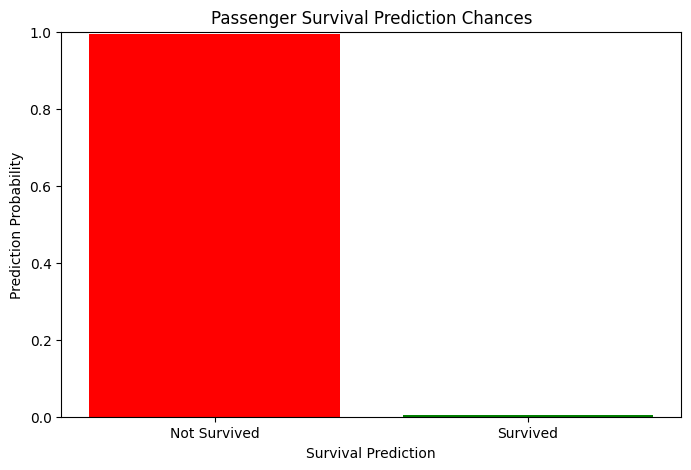

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("tested.csv")

# Preprocess the data
def preprocess_data(df):
    # Drop irrelevant columns and columns with too many missing values
    df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

    # Fill missing age values with the mean age
    df["Age"].fillna(df["Age"].mean(), inplace=True)

    # Fill missing Embarked values with the most common value
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

    # Convert categorical variables to one-hot encoded columns
    df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

    return df

data = preprocess_data(data)

# Split the data into features and labels
X = data.drop(columns=["Survived"])
y = data["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Function to predict survival and show the graph
def predict_survival():
    # Take input from the user
    print("Please provide passenger information:")
    pclass = int(input("Pclass (1, 2, 3): "))
    sex = input("Sex (male or female): ")
    age = float(input("Age: "))
    sib_sp = int(input("SibSp: "))
    parch = int(input("Parch: "))
    fare = float(input("Fare: "))
    embarked = input("Embarked (C, Q, or S): ")

    # Preprocess user input and make predictions
    user_input = pd.DataFrame(
        {
            "Pclass": [pclass],
            "Sex_male": [1 if sex.lower() == "male" else 0],
            "Embarked_Q": [1 if embarked.upper() == "Q" else 0],
            "Embarked_S": [1 if embarked.upper() == "S" else 0],
            "Age": [age],
            "SibSp": [sib_sp],
            "Parch": [parch],
            "Fare": [fare],
        }
    )

    # Reorder the columns to match the training DataFrame
    user_input = user_input[X_train.columns]

    # Predict using the trained model
    prediction = model.predict_proba(user_input)

    # Plotting the prediction chances graph
    plt.figure(figsize=(8, 5))
    plt.bar(["Not Survived", "Survived"], prediction[0], color=["red", "green"])
    plt.xlabel("Survival Prediction")
    plt.ylabel("Prediction Probability")
    plt.title("Passenger Survival Prediction Chances")
    plt.ylim(0, 1)

    # Output prediction result
    if prediction[0][0] > prediction[0][1]:
        print("The passenger did not survive.")
    else:
        print("The passenger survived.")

    plt.show()

# Make predictions using user input and show the graph
predict_survival()
